In [1]:
import xlrd

folders = ["06-07", "07-08", "08-09", "09-10", "10-11", "11-12", "12-13", \
           "13-14", "14-15", "15-16", "16-17", "17-18", "18-19", "19-20"]
files = ["2006_2007", "2007_2008", "2008_2009", "2009_2010", "2010_2011", \
         "2011_2012", "2012_2013", "2013_2014", "2014_2015", "2015_2016", \
         "2016_2017", "2017_2018", "2018_2019", "2019_2020"]
quarters = ["Q1", "Q2", "Q3", "Q4"]


In [2]:
def getData(filename):
    workbook = xlrd.open_workbook(filename)
    worksheet = workbook.sheet_by_index(0)

    data = []
    start_row = 6

    for i in range(start_row, worksheet.nrows):
        school_name = worksheet.cell(i, 1).value
        school_state = worksheet.cell(i, 2).value
        school_type = worksheet.cell(i, 4).value
        school_sub = [worksheet.cell(i, 5).value, worksheet.cell(i, 6).value, worksheet.cell(i, 7).value,\
                      worksheet.cell(i, 8).value, worksheet.cell(i, 9).value]
        school_unsub = [worksheet.cell(i, 10).value, worksheet.cell(i, 11).value,\
                        worksheet.cell(i, 12).value, worksheet.cell(i, 13).value,\
                        worksheet.cell(i, 14).value]
        school_plus = [worksheet.cell(i, 20).value, worksheet.cell(i, 21).value,\
                       worksheet.cell(i, 22).value, worksheet.cell(i, 23).value,\
                       worksheet.cell(i, 24).value]

        row = {}
        row['state'] = school_state
        row['type'] = school_type
        row['sub'] = school_sub
        row['unsub'] = school_unsub
        row['plus'] = school_plus
        data.append(row)
    return data


In [3]:
average_loan_per_person = {}  # this is the average for that year and quarter, [year][quarter]
average_loan_school_type = {} # this is the average loan for that school type, [year][quarter][type]
average_loan_state = {}       # this is the average loan for that each state , [year][quarter][state]

In [4]:
def getMetrics(data, year, quarter):
    # indexed off school type ('Public, private') and state the school is in ("TN")
    # total gives running total, other gives count
    school_type_total = {}
    school_type_count = {}
    state_total = {}
    state_count = {}
    
    total_dollar_disbursed = 0
    sub_dollar_disbursed = 0
    unsub_dollar_disbursed = 0
    plus_dollar_disbursed = 0

    total_num_disbursed = 0
    sub_num_disbursed = 0
    unsub_num_disbursed = 0
    plus_num_disbursed = 0


    for row in data:
        school_type = row['type'].upper()
        school_state = row['state'].upper()
        
        # init keys here since we do += below
        if school_type not in school_type_total:
            school_type_total[school_type] = 0
        if school_type not in school_type_count:
            school_type_count[school_type] = 0
        if school_state not in state_total:
            state_total[school_state] = 0
        if school_state not in state_count:
            state_count[school_state] = 0

        if row['sub'][4] != '-' and row['sub'][4] != ' -':            
            total_dollar_disbursed += row['sub'][4]
            sub_dollar_disbursed += row['sub'][4]
            total_num_disbursed += row['sub'][3]
            sub_num_disbursed += row['sub'][3]
            
            school_type_total[school_type] += row['sub'][4]
            school_type_count[school_type] += row['sub'][3]
            state_total[school_state] += row['sub'][4]
            state_count[school_state] += row['sub'][3]

        if row['unsub'][4] != '-' and row['unsub'][4] != ' -':
            total_dollar_disbursed += row['unsub'][4]
            unsub_dollar_disbursed += row['unsub'][4]
            total_num_disbursed += row['unsub'][3]
            unsub_num_disbursed += row['unsub'][3]
            
            school_type_total[school_type] += row['unsub'][4]
            school_type_count[school_type] += row['unsub'][3]
            state_total[school_state] += row['unsub'][4]
            state_count[school_state] += row['unsub'][3]

        if row['plus'][4] != '-' and row['plus'][4] != ' -':
            total_dollar_disbursed += row['plus'][4]
            plus_dollar_disbursed += row['plus'][4]
            total_num_disbursed += row['plus'][3]
            plus_num_disbursed += row['plus'][3]
            
            school_type_total[school_type] += row['plus'][4]
            school_type_count[school_type] += row['plus'][3]
            state_total[school_state] += row['plus'][4]
            state_count[school_state] += row['plus'][3]
            
    # init dictionaries here since they might not exist when dereferencing them below
    if year not in average_loan_per_person:
        average_loan_per_person[year] = {}
    if year not in average_loan_school_type:
        average_loan_school_type[year] = {}
    if year not in average_loan_state:
        average_loan_state[year] = {}

    if quarter not in average_loan_per_person[year]:
        average_loan_per_person[year][quarter] = {}
    if quarter not in average_loan_school_type[year]:
        average_loan_school_type[year][quarter] = {}
    if quarter not in average_loan_state[year]:
        average_loan_state[year][quarter] = {}

        
    if total_num_disbursed == 0:
        average_loan_per_person[year][quarter] = 0;
    else:
        average_loan_per_person[year][quarter] = total_dollar_disbursed/total_num_disbursed
    
    for key in school_type_total.keys():
        if key not in average_loan_school_type[year][quarter]:
            average_loan_school_type[year][quarter][key] = {}
        
        # handle division by 0
        if school_type_count[key] == 0:
            average_loan_school_type[year][quarter][key] = 0
        else:
            average_loan_school_type[year][quarter][key] = school_type_total[key]/school_type_count[key]
    for key in state_total.keys():
        if key not in average_loan_state[year][quarter]:
            average_loan_state[year][quarter][key] = {}
            
        # handle division by 0
        if state_count[key] == 0:
            average_loan_state[year][quarter][key] = 0
        else:
            average_loan_state[year][quarter][key] = state_total[key]/state_count[key]


In [5]:
for i in range(len(folders)):
    for quarter in quarters:
        filename = '../data/06-20/' + folders[i] + '/DL_Dashboard_AY' + files[i] + '_' + quarter + '.xls'
        data = getData(filename)
        getMetrics(data, files[i], quarter)

In [6]:
# convert data into an easy-to-graph representation
average_loan_per_person_array = {}  # year_quarter: average loan amount
average_loan_school_type_array = {} # school type: year_quarter: average loan amount
average_loan_state_array = {} # state: year_quarter: average loan amount

for year in average_loan_per_person:
    for quarter in average_loan_per_person[year]:
        x = year+'_'+quarter
        average_loan_per_person_array[x] = average_loan_per_person[year][quarter]
        
        for school_type in average_loan_school_type[year][quarter]:
            if school_type not in average_loan_school_type_array:
                average_loan_school_type_array[school_type] = {}
            average_loan_school_type_array[school_type][x] = average_loan_school_type[year][quarter][school_type]
            
        for state in average_loan_state[year][quarter]:
            if state not in average_loan_state_array:
                average_loan_state_array[state] = {}
            average_loan_state_array[state][x] = average_loan_state[year][quarter][state]

# test prints
# print(average_loan_per_person_array['2018_2019_Q1'])
# print(average_loan_school_type_array['PUBLIC'])
# print(average_loan_state_array['TN'])

# combine "private-nonprofit" with "private", theyre the same thing w/ different names after like 2013
average_loan_school_type_array["PRIVATE"].update(average_loan_school_type_array["PRIVATE-NONPROFIT"])
del average_loan_school_type_array["PRIVATE-NONPROFIT"]

In [7]:
# average the quarters together for each year
average_loan_per_person_array_combined = {}
average_loan_school_type_array_combined = {}
average_loan_state_array_combined = {}

for year_quarter in average_loan_per_person_array:
    year = year_quarter[:-3] # remove the '_Q#' from the string

    if year not in average_loan_per_person_array_combined:
        average_loan_per_person_array_combined[year] = 0

    average_loan_per_person_array_combined[year] += average_loan_per_person_array[year_quarter]
    

for school_type in average_loan_school_type_array:
    if school_type not in average_loan_school_type_array_combined:
        average_loan_school_type_array_combined[school_type] = {}
    
    for year_quarter in average_loan_school_type_array[school_type]:
        year = year_quarter[:-3] # remove the '_Q#' from the string

        if year not in average_loan_school_type_array_combined[school_type]:
            average_loan_school_type_array_combined[school_type][year] = 0

        average_loan_school_type_array_combined[school_type][year] += average_loan_school_type_array[school_type][year_quarter]
    
        
for state in average_loan_state_array:
    if state not in average_loan_state_array_combined:
        average_loan_state_array_combined[state] = {}
    
    for year_quarter in average_loan_state_array[state]:
        year = year_quarter[:-3] # remove the '_Q#' from the string

        if year not in average_loan_state_array_combined[state]:
            average_loan_state_array_combined[state][year] = 0

        average_loan_state_array_combined[state][year] += average_loan_state_array[state][year_quarter]
    

# update arrays for graphing
average_loan_per_person_array = average_loan_per_person_array_combined
average_loan_school_type_array = average_loan_school_type_array_combined
average_loan_state_array = average_loan_state_array_combined


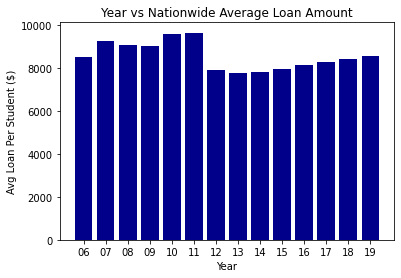

In [8]:
# Year vs Average Loan Amount Nationwide
years = ["06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19"]

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(average_loan_per_person_array.items(), columns=['Year_Quarter', 'Avg Loan Amount'])
x = df["Year_Quarter"]
y = df["Avg Loan Amount"]

plt.bar(x, y, width=0.8, color='darkblue')
plt.xlabel("Year")
plt.ylabel("Avg Loan Per Student ($)")
plt.title("Year vs Nationwide Average Loan Amount")
plt.xticks(np.arange(len(years)), years)
plt.show()


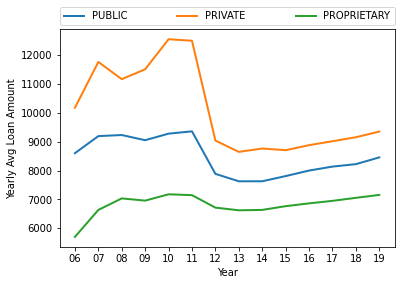

In [9]:
# Year vs Average Loan Amount Per School Type
for school_type in average_loan_school_type_array:
    if school_type.startswith("FOREIGN"):
        continue
    df = pd.DataFrame(average_loan_school_type_array[school_type].items(), columns=['Year', 'Avg Loan Amount'])
    x = df["Year"]
    y = df["Avg Loan Amount"]
    plt.plot(x, y, linewidth=2, label=school_type)

plt.xlabel("Year")
plt.ylabel("Yearly Avg Loan Amount")
plt.xticks(np.arange(len(years)), years)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.) # https://stackoverflow.com/questions/44413020
plt.show()


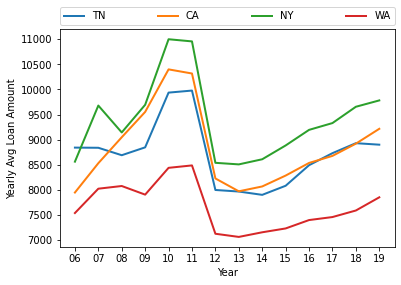

In [10]:
# Year vs Average Loan Amount Per State
state_list = ["TN", "CA", "NY", "WA"]

# for state in average_loan_state_array: # this will graph all states
for state in state_list:
    df = pd.DataFrame(average_loan_state_array[state].items(), columns=['Year_Quarter', 'Avg Loan Amount'])
    x = df["Year_Quarter"]
    y = df["Avg Loan Amount"]    
    plt.plot(x, y, linewidth=2, label=state)

plt.xlabel("Year")
plt.ylabel("Yearly Avg Loan Amount")
plt.xticks(np.arange(len(years)), years)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.) # https://stackoverflow.com/questions/44413020
plt.show()

# todo, consider https://python-graph-gallery.com/124-spaghetti-plot/

# Now looking at school's average loan vs average ACT score:

In [11]:
import xlrd
import matplotlib.pyplot as plt
import numpy as np

quarters = ["Q1", "Q2", "Q3", "Q4"]

colleges = ['CALIFORNIA INSTITUTE OF TECHNOLOGY', 'MASSACHUSETTS INSTITUTE OF TECHNOLOGY', \
           'UNIVERSITY OF CHICAGO (THE)', 'VANDERBILT UNIVERSITY', 'OHIO STATE UNIVERSITY', \
           'UNIVERSITY OF TENNESSEE', 'UNIVERSITY OF ALABAMA AT BIRMINGHAM', \
           'TENNESSEE TECHNOLOGICAL UNIVERSITY', 'JACKSONVILLE UNIVERSITY', 'TENNESSEE STATE UNIVERSITY']
act_scores = [36, 35, 34, 34, 30, 27, 25, 24, 23, 18]


In [12]:
def getData(filename):
    workbook = xlrd.open_workbook(filename)
    worksheet = workbook.sheet_by_index(0)

    data = []
    start_row = 6

    for i in range(start_row, worksheet.nrows):
        school_name = worksheet.cell(i, 1).value
        school_state = worksheet.cell(i, 2).value
        school_type = worksheet.cell(i, 4).value
        school_sub = [worksheet.cell(i, 5).value, worksheet.cell(i, 6).value, worksheet.cell(i, 7).value,\
                      worksheet.cell(i, 8).value, worksheet.cell(i, 9).value]
        school_unsub = [worksheet.cell(i, 10).value, worksheet.cell(i, 11).value,\
                        worksheet.cell(i, 12).value, worksheet.cell(i, 13).value,\
                        worksheet.cell(i, 14).value]
        school_plus = [worksheet.cell(i, 20).value, worksheet.cell(i, 21).value,\
                       worksheet.cell(i, 22).value, worksheet.cell(i, 23).value,\
                       worksheet.cell(i, 24).value]

        row = {}
        row['name'] = school_name
        row['state'] = school_state
        row['type'] = school_type
        row['sub'] = school_sub
        row['unsub'] = school_unsub
        row['plus'] = school_plus
        data.append(row)
    return data

In [13]:
def loan_vs(data, colleges):
    sub_array = []
    unsub_array = []
    plus_array = []
    total_array = []
    for x in colleges:        
        tot_sub_rec = 0
        tot_unsub_rec = 0
        tot_plus_rec = 0
        tot_sub_dis = 0
        tot_unsub_dis = 0
        tot_plus_dis = 0
        
        for q in data:
            for row in q:
                if x == row['name']:
                    if row['sub'][4] != '-' and row['sub'][4] != ' -':
                        tot_sub_rec += row['sub'][3]
                        tot_sub_dis += row['sub'][4]
                    
                    if row['unsub'][4] != '-' and row['unsub'][4] != ' -':
                        tot_unsub_rec += row['unsub'][3]
                        tot_unsub_dis += row['unsub'][4]
                    
                    if row['plus'][4] != '-' and row['plus'][4] != ' -':
                        tot_plus_rec += row['plus'][3]
                        tot_plus_dis += row['plus'][4]
                    # print("found school:", x, "with tot_sub_dis =", tot_sub_dis)
                    break
        
        # these fix div by 0 errors
        if tot_sub_rec == 0:
            sub_per_rec = 0
        else:
            sub_per_rec = tot_sub_dis / tot_sub_rec
            
        if tot_unsub_rec == 0:
            unsub_per_rec = 0
        else:
            unsub_per_rec = tot_unsub_dis / tot_unsub_rec

        if tot_plus_rec == 0:
            plus_per_rec = 0
        else:
            plus_per_rec = tot_plus_dis / tot_plus_rec

        
        total = tot_sub_dis + tot_unsub_dis + tot_plus_dis
        count = tot_sub_rec + tot_unsub_rec + tot_plus_rec
        
        if count == 0:
            average = 0
        else:
            average = total / count
                
        sub_array.append(round(sub_per_rec, 2))
        unsub_array.append(round(unsub_per_rec, 2))
        plus_array.append(round(plus_per_rec,2))
        total_array.append(round(average, 2))


        # print(x)
        # print('Subsidized:', sub_per_rec)
        # print('Unsubsidized:', unsub_per_rec)
        # print('Plus:', plus_per_rec)
        # print(average)
        # print()
        
        
    # return sub_array, unsub_array, plus_array
    return total_array

In [14]:
#Average Loan vs. ACT score of the school
data = []
for quarter in quarters:
    filename = '../data/06-20/17-18/DL_Dashboard_AY2017_2018_' + quarter + '.xls'
    data.append(getData(filename))

loan_data = loan_vs(data, colleges)


In [15]:
for i in range(len(colleges)):
    print(colleges[i], "has an average act score of", act_scores[i], "and an average loan of $" + str(loan_data[i] * 4), "per year")

CALIFORNIA INSTITUTE OF TECHNOLOGY has an average act score of 36 and an average loan of $12602.28 per year
MASSACHUSETTS INSTITUTE OF TECHNOLOGY has an average act score of 35 and an average loan of $16079.84 per year
UNIVERSITY OF CHICAGO (THE) has an average act score of 34 and an average loan of $11175.72 per year
VANDERBILT UNIVERSITY has an average act score of 34 and an average loan of $16453.68 per year
OHIO STATE UNIVERSITY has an average act score of 30 and an average loan of $9923.64 per year
UNIVERSITY OF TENNESSEE has an average act score of 27 and an average loan of $11528.88 per year
UNIVERSITY OF ALABAMA AT BIRMINGHAM has an average act score of 25 and an average loan of $9454.32 per year
TENNESSEE TECHNOLOGICAL UNIVERSITY has an average act score of 24 and an average loan of $8527.96 per year
JACKSONVILLE UNIVERSITY has an average act score of 23 and an average loan of $12029.56 per year
TENNESSEE STATE UNIVERSITY has an average act score of 18 and an average loan of $

[Text(0, 0.5, 'Avg Loan Amount'), Text(0.5, 0, 'Average ACT Score')]

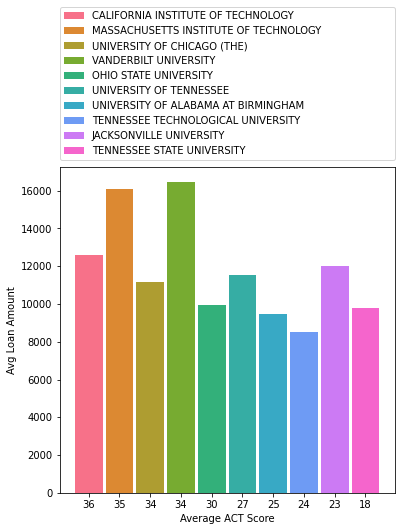

In [16]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

x = act_scores
y = [i*4 for i in loan_data] 

f, ax = plt.subplots(figsize=(6, 6))
colors = sns.color_palette("husl", len(colleges))
xticks = [i for i in range(len(colleges))]

for i in range(len(colleges)):
    plt.bar(xticks[i], y[i], width=0.9, color=colors[i], label=colleges[i])

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, mode="expand", borderaxespad=0.) # https://stackoverflow.com/questions/44413020
plt.xticks(xticks, x)

ax.set(ylabel="Avg Loan Amount", xlabel="Average ACT Score")


# Now experimenting with race/gender info

In [17]:
from nltk.tokenize import word_tokenize

stopwords = ["the", "(", ")", "a", "of", "in", "at", ",", "'s"]
def preprocess(name):
    name = name.lower()
    tokens = word_tokenize(name)
    tokens_without_sw = [word for word in tokens if not word in stopwords]
    name = (" ").join(tokens_without_sw)
    return name


In [18]:
data = pd.read_excel(r'../data/IPEDS_data.xlsx')

# here, black referes to black/african american, hispanic refers to hispanic/latino
columns_to_keep = ["Name", "Degree of urbanization (Urban-centric locale)", "Percent of total enrollment that are White", "Percent of total enrollment that are women", "Percent of total enrollment that are Asian", "Percent of total enrollment that are Black or African American", "Percent of total enrollment that are Hispanic/Latino"]
df = data[columns_to_keep]
df = df.rename({"Name": "name", "Degree of urbanization (Urban-centric locale)": "urban", "Percent of total enrollment that are White": "white", "Percent of total enrollment that are women": "women", "Percent of total enrollment that are Asian": "asian", "Percent of total enrollment that are Black or African American": "black", "Percent of total enrollment that are Hispanic/Latino": "hispanic"}, axis=1)
df["men"] = 100-df["women"]
df["name"] = [preprocess(name) for name in df["name"].values]

In [19]:
def getData(filename):
    workbook = xlrd.open_workbook(filename)
    worksheet = workbook.sheet_by_index(0)

    data = []
    start_row = 6

    for i in range(start_row, worksheet.nrows):
        school_name = worksheet.cell(i, 1).value 
        school_state = worksheet.cell(i, 2).value
        school_type = worksheet.cell(i, 4).value 
        school_sub = [worksheet.cell(i, 5).value, worksheet.cell(i, 6).value, worksheet.cell(i, 7).value,\
                      worksheet.cell(i, 8).value, worksheet.cell(i, 9).value]
        school_unsub = [worksheet.cell(i, 10).value, worksheet.cell(i, 11).value,\
                        worksheet.cell(i, 12).value, worksheet.cell(i, 13).value,\
                        worksheet.cell(i, 14).value]
        school_plus = [worksheet.cell(i, 20).value, worksheet.cell(i, 21).value,\
                       worksheet.cell(i, 22).value, worksheet.cell(i, 23).value,\
                       worksheet.cell(i, 24).value]

        row = {}
        row['name'] = school_name
        row['sub'] = school_sub
        row['unsub'] = school_unsub
        row['plus'] = school_plus
        data.append(row)
    return data


In [20]:
def loan_vs(data):
    colleges = []
    total = []
    count = []
    avg = []
    index = -1
    
    for q in data:
        for row in q:
            school_name = preprocess(row['name'])
            
            try:
                index = colleges.index(school_name)
            except:
                # need to insert school and values of 0
                colleges.append(school_name)
                total.append(0)
                count.append(0)
                index = len(colleges)-1 # the last index
                
            if row['sub'][4] != '-' and row['sub'][4] != ' -':
                count[index] += row['sub'][3]
                total[index] += row['sub'][4]

            if row['unsub'][4] != '-' and row['unsub'][4] != ' -':
                count[index] += row['unsub'][3]
                total[index] += row['unsub'][4]

            if row['plus'][4] != '-' and row['plus'][4] != ' -':
                count[index] += row['plus'][3]
                total[index] += row['plus'][4]
        
    for i in range(len(total)):
        if count[i] == 0:
            avg.append(0)
        else:
            avg.append(total[i]/count[i])
        
    return colleges, avg


In [21]:
# Get avg loan per school here
data = []
for quarter in quarters:
    filename = '../data/06-20/12-13/DL_Dashboard_AY2012_2013_' + quarter + '.xls'
    data.append(getData(filename))

colleges, avg = loan_vs(data)            

In [22]:
# get indexes of college names that appear in both datasets
# indexes contains indexes into df["name"]
indexes = []
averages = [] # this needs to be in the same order as the df
for i in range(len(df["name"])):
    for j in range(len(colleges)):
        if df["name"][i] == colleges[j]:
            indexes.append(i)
            averages.append(avg[j])

drop_indexes = []
for i in range(len(df["name"])):
    if i not in indexes:
        drop_indexes.append(i)

df = df.drop(drop_indexes)
df["loan_avg"] = averages


In [23]:
print(df)

                                              name          urban  white  \
1                    university alabama birmingham  City: Midsize   64.0   
2                               amridge university  City: Midsize   30.0   
3                    university alabama huntsville  City: Midsize   69.0   
4                         alabama state university  City: Midsize    3.0   
5                               university alabama    City: Small   77.0   
...                                            ...            ...    ...   
1517  harrisburg university science and technology    City: Small   51.0   
1519                        union graduate college    City: Small   64.0   
1520                      georgia gwinnett college  Suburb: Large   42.0   
1526                               university west  Suburb: Large    9.0   
1532                  providence christian college  City: Midsize   79.0   

      women  asian  black  hispanic   men     loan_avg  
1      61.0    5.0   21.0     

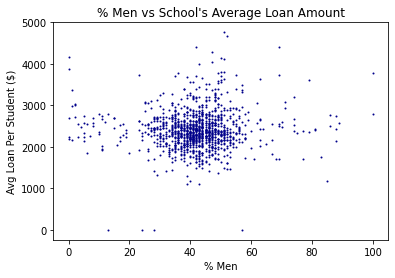

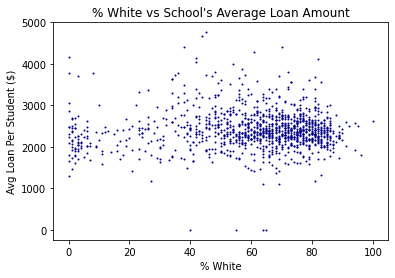

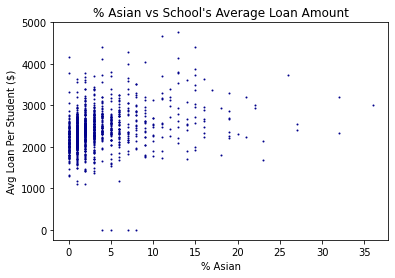

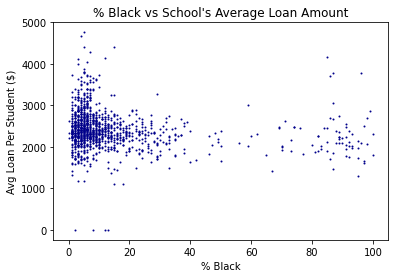

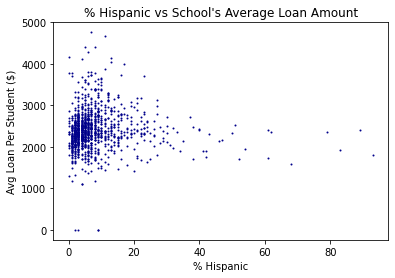

In [24]:
import matplotlib.pyplot as plt

x = df["men"]
y = df["loan_avg"]
plt.scatter(x, y, s=1, color='darkblue')
plt.xlabel("% Men")
plt.ylabel("Avg Loan Per Student ($)")
plt.title("% Men vs School's Average Loan Amount")
plt.show()

x = df["white"]
y = df["loan_avg"]
plt.scatter(x, y, s=1, color='darkblue')
plt.xlabel("% White")
plt.ylabel("Avg Loan Per Student ($)")
plt.title("% White vs School's Average Loan Amount")
plt.show()

x = df["asian"]
y = df["loan_avg"]
plt.scatter(x, y, s=1, color='darkblue')
plt.xlabel("% Asian")
plt.ylabel("Avg Loan Per Student ($)")
plt.title("% Asian vs School's Average Loan Amount")
plt.show()

x = df["black"]
y = df["loan_avg"]
plt.scatter(x, y, s=1, color='darkblue')
plt.xlabel("% Black")
plt.ylabel("Avg Loan Per Student ($)")
plt.title("% Black vs School's Average Loan Amount")
plt.show()

x = df["hispanic"]
y = df["loan_avg"]
plt.scatter(x, y, s=1, color='darkblue')
plt.xlabel("% Hispanic")
plt.ylabel("Avg Loan Per Student ($)")
plt.title("% Hispanic vs School's Average Loan Amount")
plt.show()


### Now look at school size vs loan amount

In [25]:
# drop schools that dont match these school sizes
sizes = ["City: Small", "Suburb: Small", "City: Midsize", "Suburb: Midsize", "City: Large", "Suburb: Large"]

df = df.reset_index()
drop_indexes = []
for i in range(len(df["urban"])):
    if df.iloc[i]["urban"] not in sizes:
        drop_indexes.append(i)

df = df.drop(drop_indexes)


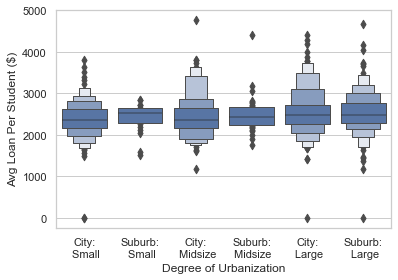

In [26]:
sns.set_theme(style="whitegrid")
labels = ["City:\n Small", "Suburb:\n Small", "City:\n Midsize", "Suburb:\n Midsize", "City:\n Large", "Suburb:\n Large"]

x = df["urban"]
y = df["loan_avg"]

plot = sns.boxenplot(x=x, y=y, color="b", order=sizes, scale="linear")
plot.set(xticklabels=labels)
plot.set(xlabel='Degree of Urbanization', ylabel='Avg Loan Per Student ($)')
plt.show()


